In [184]:
import pandas as pd
import numpy as np
import requests, json
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from tqdm import tqdm
from time import sleep

import warnings
warnings.filterwarnings('ignore')

# Creating dataset

Scrap matchlogs data from Fbref:

In [185]:
def get_player_matchlogs(url):
    r = requests.get(url, verify=False)
    soup = BeautifulSoup(r.content, 'html.parser')
    table = soup.find('table', id='matchlogs_all')
    match_logs = pd.read_html(str(table))[0]
    match_logs = match_logs.dropna()
    return match_logs

In [186]:
# seasons = [
#     "20-21",
#     "21-22",
#     "22-23",
#     "23-24"
# ]

# df = pd.DataFrame()
# df_matchlogs = pd.DataFrame()
# fbref_ids = pd.read_csv("https://raw.githubusercontent.com/ChrisMusson/FPL-ID-Map/main/FBRef.csv")
# failed_urls = []

# for season in seasons:
#     print("Gathering data, season "+season)
#     gws_seasonal = pd.read_csv(f"https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/20{season}/gws/merged_gw.csv")
#     ids = pd.read_csv(f"https://raw.githubusercontent.com/ChrisMusson/FPL-ID-Map/main/FPL/{season}.csv")
#     ids = ids.merge(fbref_ids.loc[:, ['code','fbref']], how='left', on='code')
#     gws_seasonal = gws_seasonal.merge(ids.loc[:, ['code',season]], how='left', left_on='element', right_on=season)
#     gws_seasonal = gws_seasonal.drop(season, axis=1)
#     gws_seasonal = gws_seasonal.merge(ids.loc[:, [season,'fbref']], how='left', left_on='element', right_on=season)
#     gws_seasonal.drop(season, axis=1)
#     players = gws_seasonal[gws_seasonal['minutes']!=0]["element"].unique()
#     print(len(players))
#     for player in tqdm(players):
#         fbref_id = ids.loc[ids[season]==player]['fbref'].iloc[0]
#         code = ids.loc[ids[season]==player]['code'].iloc[0]
#         season_string = "-".join(["20"+year for year in season.split("-")])
#         fbref_url = f"https://fbref.com/en/players/{fbref_id}/matchlogs/{season_string}/"
#         try:
#             match_logs = get_player_matchlogs(fbref_url)
#             match_logs['code'] = code
#             df_matchlogs = pd.concat([df_matchlogs, match_logs])
#         except:
#             failed_urls.append(fbref_url)
#         sleep(4)
#     df = pd.concat([df, gws_seasonal])

Save datasets to files for future use:

In [187]:
# df_matchlogs.to_csv('../data/fbref_matchlogs.csv')
# df.to_csv('../data/gameweeks_fpl.csv')

Load previously created datasets:

In [188]:
df_matchlogs = pd.read_csv('../data/fbref_matchlogs.csv')
df = pd.read_csv('../data/gameweeks_fpl.csv')

In [189]:
df_matchlogs['code'].iloc[0] = 'code'
df_matchlogs.iloc[0,30] += '_passes'
df_matchlogs.iloc[0,35] += '_takeons'
df_matchlogs.iloc[0,-8] += '_GK'
df_matchlogs.iloc[0,-14] += '_Lounched'
df_matchlogs.iloc[0,-15] += '_Lounched'
df_matchlogs.iloc[0,-19] += '_GK'
df_matchlogs.columns = df_matchlogs.iloc[0]
df_matchlogs = df_matchlogs.drop(0)

Change kickoff time to "datetime" type:

In [190]:
df['kickoff_time'] = pd.to_datetime(df['kickoff_time'])
df['Date'] = df['kickoff_time'].dt.date
df['Date'] = pd.to_datetime(df["Date"])
df_matchlogs['Date'] = pd.to_datetime(df_matchlogs['Date'])

Drop first columns (index):

In [191]:
df = df.drop("Unnamed: 0", axis=1)
df_matchlogs = df_matchlogs.iloc[: , 1:]

Merge DataFrames on code (unique for each player) and date to match game stats to FPL gameweek:

In [192]:
df = df.merge(df_matchlogs, on=['code', 'Date'], how='left')

Get rid of all records with 0 minutes (player not featured in a game):

In [193]:
df = df[df['minutes'] != 0]

See amount of "N.A." values for each feature:

In [194]:
df.isna().sum().to_dict()

{'name': 0,
 'position': 0,
 'team': 0,
 'xP': 0,
 'assists': 0,
 'bonus': 0,
 'bps': 0,
 'clean_sheets': 0,
 'creativity': 0,
 'element': 0,
 'fixture': 0,
 'goals_conceded': 0,
 'goals_scored': 0,
 'ict_index': 0,
 'influence': 0,
 'kickoff_time': 0,
 'minutes': 0,
 'opponent_team': 0,
 'own_goals': 0,
 'penalties_missed': 0,
 'penalties_saved': 0,
 'red_cards': 0,
 'round': 0,
 'saves': 0,
 'selected': 0,
 'team_a_score': 0,
 'team_h_score': 0,
 'threat': 0,
 'total_points': 0,
 'transfers_balance': 0,
 'transfers_in': 0,
 'transfers_out': 0,
 'value': 0,
 'was_home': 0,
 'yellow_cards': 0,
 'GW': 0,
 'code': 0,
 'expected_assists': 20878,
 'expected_goal_involvements': 20878,
 'expected_goals': 20878,
 'expected_goals_conceded': 20878,
 'starts': 20878,
 'Date': 0,
 'Day': 902,
 'Comp': 902,
 'Round': 902,
 'Venue': 902,
 'Result': 902,
 'Squad': 902,
 'Opponent': 902,
 'Start': 902,
 'Pos': 902,
 'Min': 902,
 'Gls': 3390,
 'Ast': 3390,
 'PK': 3390,
 'PKatt': 3390,
 'Sh': 3390,
 'S

Drop incomplete records (902): 

In [195]:
df.dropna(subset=['Start'], inplace=True)

In [196]:
df.isna().sum().to_dict()

{'name': 0,
 'position': 0,
 'team': 0,
 'xP': 0,
 'assists': 0,
 'bonus': 0,
 'bps': 0,
 'clean_sheets': 0,
 'creativity': 0,
 'element': 0,
 'fixture': 0,
 'goals_conceded': 0,
 'goals_scored': 0,
 'ict_index': 0,
 'influence': 0,
 'kickoff_time': 0,
 'minutes': 0,
 'opponent_team': 0,
 'own_goals': 0,
 'penalties_missed': 0,
 'penalties_saved': 0,
 'red_cards': 0,
 'round': 0,
 'saves': 0,
 'selected': 0,
 'team_a_score': 0,
 'team_h_score': 0,
 'threat': 0,
 'total_points': 0,
 'transfers_balance': 0,
 'transfers_in': 0,
 'transfers_out': 0,
 'value': 0,
 'was_home': 0,
 'yellow_cards': 0,
 'GW': 0,
 'code': 0,
 'expected_assists': 20447,
 'expected_goal_involvements': 20447,
 'expected_goals': 20447,
 'expected_goals_conceded': 20447,
 'starts': 20447,
 'Date': 0,
 'Day': 0,
 'Comp': 0,
 'Round': 0,
 'Venue': 0,
 'Result': 0,
 'Squad': 0,
 'Opponent': 0,
 'Start': 0,
 'Pos': 0,
 'Min': 0,
 'Gls': 2488,
 'Ast': 2488,
 'PK': 2488,
 'PKatt': 2488,
 'Sh': 2488,
 'SoT': 2488,
 'CrdY': 

<Axes: >

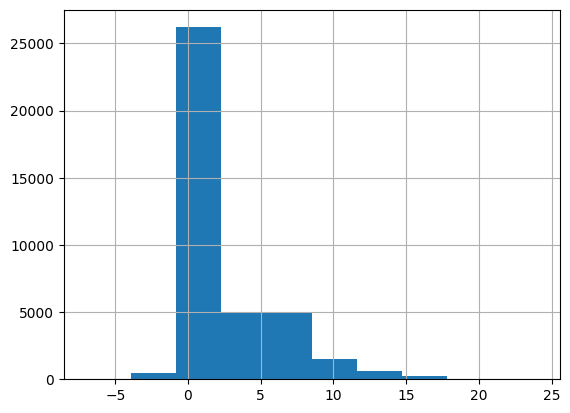

In [197]:
df['total_points'].hist()

Get rid of irrelevant or duplicated features: 

In [198]:
df.drop(['team', 'xP', 'element', 'fixture', 'Date', 'kickoff_time', 'opponent_team', 'round', 'selected', 'team_a_score', 'team_h_score','transfers_balance', 
         'transfers_in', 'transfers_out', 'code', 'expected_assists', 'expected_goal_involvements', 'expected_goals', 'expected_goals_conceded',
         'starts', 'Comp', 'Round', 'Venue', 'Result', 'Min', 'Gls', 'Ast', 'Match Report', 'Pos', 'Day'], axis=1, inplace=True)

Now only na values are in numerical columns, so we fill them with 0:

In [199]:
df.fillna(0, inplace=True)

In [200]:
df.isna().sum().to_dict()

{'name': 0,
 'position': 0,
 'assists': 0,
 'bonus': 0,
 'bps': 0,
 'clean_sheets': 0,
 'creativity': 0,
 'goals_conceded': 0,
 'goals_scored': 0,
 'ict_index': 0,
 'influence': 0,
 'minutes': 0,
 'own_goals': 0,
 'penalties_missed': 0,
 'penalties_saved': 0,
 'red_cards': 0,
 'saves': 0,
 'threat': 0,
 'total_points': 0,
 'value': 0,
 'was_home': 0,
 'yellow_cards': 0,
 'GW': 0,
 'Squad': 0,
 'Opponent': 0,
 'Start': 0,
 'PK': 0,
 'PKatt': 0,
 'Sh': 0,
 'SoT': 0,
 'CrdY': 0,
 'CrdR': 0,
 'Touches': 0,
 'Tkl': 0,
 'Int': 0,
 'Blocks': 0,
 'xG': 0,
 'npxG': 0,
 'xAG': 0,
 'SCA': 0,
 'GCA': 0,
 'Cmp': 0,
 'Att_passes': 0,
 'Cmp%': 0,
 'PrgP': 0,
 'Carries': 0,
 'PrgC': 0,
 'Att_takeons': 0,
 'Succ': 0,
 'SoTA': 0,
 'GA': 0,
 'Saves': 0,
 'Save%': 0,
 'CS': 0,
 'PSxG': 0,
 'PKatt_GK': 0,
 'PKA': 0,
 'PKsv': 0,
 'PKm': 0,
 'Cmp_Lounched': 0,
 'Att_Lounched': 0,
 'Att (GK)': 0,
 'Thr': 0,
 'Launch%': 0,
 'AvgLen': 0,
 'Att_GK': 0,
 'Opp': 0,
 'Stp': 0,
 'Stp%': 0,
 '#OPA': 0,
 'AvgDist': 0}

Replace numeric stats with a sum from previous 5 games, e.g. assists -> sum of assists from last 5 games:

In [201]:
df.columns

Index(['name', 'position', 'assists', 'bonus', 'bps', 'clean_sheets',
       'creativity', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'minutes', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'saves', 'threat', 'total_points',
       'value', 'was_home', 'yellow_cards', 'GW', 'Squad', 'Opponent', 'Start',
       'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR', 'Touches', 'Tkl', 'Int',
       'Blocks', 'xG', 'npxG', 'xAG', 'SCA', 'GCA', 'Cmp', 'Att_passes',
       'Cmp%', 'PrgP', 'Carries', 'PrgC', 'Att_takeons', 'Succ', 'SoTA', 'GA',
       'Saves', 'Save%', 'CS', 'PSxG', 'PKatt_GK', 'PKA', 'PKsv', 'PKm',
       'Cmp_Lounched', 'Att_Lounched', 'Cmp%', 'Att (GK)', 'Thr', 'Launch%',
       'AvgLen', 'Att_GK', 'Launch%', 'AvgLen', 'Opp', 'Stp', 'Stp%', '#OPA',
       'AvgDist'],
      dtype='object')

In [202]:
df['gw_points'] = df['total_points']
rolling_features_sum = [
    'assists',
    'bonus',
    'bps',
    'clean_sheets',
    'goals_conceded',
    'goals_scored',
    'minutes',
    'own_goals',
    'penalties_missed',
    'penalties_saved',
    'red_cards',
    'saves',
    'total_points',
    'yellow_cards',
    'PK',
    'PKatt',
    'Sh',
    'SoT',
    'CrdY',
    'CrdR',
    'Touches',
    'Tkl',
    'Int',
    'Blocks',
    'xG',
    'npxG',
    'xAG',
    'SCA',
    'GCA',
    'Cmp',
    'PrgP',
    'Carries',
    'PrgC',
    'Succ',
    'SoTA',
    'GA',
    'Saves',
    'CS',
    'PSxG',
    'PKA',
    'PKsv',
    'PKm',
    'Att (GK)',
    'Thr',
    'Opp',
    'Stp',
    '#OPA',
    'Att_passes',
    'Att_takeons',
    'PKatt_GK',
    'Cmp_Lounched',
    'Att_Lounched',
    'Att_GK']

rolling_features_mean = [
    'Cmp%',
    'Save%',
    'Launch%',
    'AvgLen',
    'Stp%',
    'AvgDist']

for feature in rolling_features_sum:
    # print(feature, type(df[feature]))
    df.replace('On matchday squad, but did not play', 0, inplace=True)
    df[feature] = df[feature].astype(float)
    df[feature] = df.groupby('name')[feature].rolling(window=5, min_periods=1, closed='left').sum().reset_index(level=0, drop=True)

for feature in rolling_features_mean:
#     print(df[feature].dtype)
    df[feature] = df[feature].astype(float)
    df[feature] = df.groupby('name')[feature].rolling(window=5, min_periods=1, closed='left').mean().reset_index(level=0, drop=True)

In [203]:
df.dropna(inplace=True)

In [204]:
df['was_home'] = df['was_home'].astype(int)

def categorical_to_dummies(df, feature):
    # get the dummies and store it in a variable
    dummies = pd.get_dummies(df[feature], prefix=feature)
    dummies = dummies.astype(int)
    
    # Concatenate the dummies to original dataframe
    merged = pd.concat([df, dummies], axis='columns')
    
    # drop the values
    merged.drop(feature, axis='columns', inplace=True)

    return merged

# df = categorical_to_dummies(df, 'name')
df = categorical_to_dummies(df, 'position')
df = categorical_to_dummies(df, 'Squad')
df = categorical_to_dummies(df, 'Opponent')


In [205]:
df.columns.to_list()

['name',
 'assists',
 'bonus',
 'bps',
 'clean_sheets',
 'creativity',
 'goals_conceded',
 'goals_scored',
 'ict_index',
 'influence',
 'minutes',
 'own_goals',
 'penalties_missed',
 'penalties_saved',
 'red_cards',
 'saves',
 'threat',
 'total_points',
 'value',
 'was_home',
 'yellow_cards',
 'GW',
 'Start',
 'PK',
 'PKatt',
 'Sh',
 'SoT',
 'CrdY',
 'CrdR',
 'Touches',
 'Tkl',
 'Int',
 'Blocks',
 'xG',
 'npxG',
 'xAG',
 'SCA',
 'GCA',
 'Cmp',
 'Att_passes',
 'Cmp%',
 'PrgP',
 'Carries',
 'PrgC',
 'Att_takeons',
 'Succ',
 'SoTA',
 'GA',
 'Saves',
 'Save%',
 'CS',
 'PSxG',
 'PKatt_GK',
 'PKA',
 'PKsv',
 'PKm',
 'Cmp_Lounched',
 'Att_Lounched',
 'Cmp%',
 'Att (GK)',
 'Thr',
 'Launch%',
 'AvgLen',
 'Att_GK',
 'Launch%',
 'AvgLen',
 'Opp',
 'Stp',
 'Stp%',
 '#OPA',
 'AvgDist',
 'gw_points',
 'position_DEF',
 'position_FWD',
 'position_GK',
 'position_GKP',
 'position_MID',
 'Squad_Arsenal',
 'Squad_Aston Villa',
 'Squad_Bournemouth',
 'Squad_Brentford',
 'Squad_Brighton',
 'Squad_Burnley',

In [206]:
df.drop('name', axis=1, inplace=True)
df.Start = df.Start.replace({"Y":1, "Y*":1, "N":0})

In [ ]:
df.dtypes.to_dict()

{'name': dtype('O'),
 'assists': dtype('float64'),
 'bonus': dtype('float64'),
 'bps': dtype('float64'),
 'clean_sheets': dtype('float64'),
 'creativity': dtype('float64'),
 'goals_conceded': dtype('float64'),
 'goals_scored': dtype('float64'),
 'ict_index': dtype('float64'),
 'influence': dtype('float64'),
 'minutes': dtype('float64'),
 'own_goals': dtype('float64'),
 'penalties_missed': dtype('float64'),
 'penalties_saved': dtype('float64'),
 'red_cards': dtype('float64'),
 'saves': dtype('float64'),
 'threat': dtype('float64'),
 'total_points': dtype('float64'),
 'value': dtype('int64'),
 'was_home': dtype('int32'),
 'yellow_cards': dtype('float64'),
 'GW': dtype('int64'),
 'Start': dtype('int64'),
 'PK': dtype('float64'),
 'PKatt': dtype('float64'),
 'Sh': dtype('float64'),
 'SoT': dtype('float64'),
 'CrdY': dtype('float64'),
 'CrdR': dtype('float64'),
 'Touches': dtype('float64'),
 'Tkl': dtype('float64'),
 'Int': dtype('float64'),
 'Blocks': dtype('float64'),
 'xG': dtype('float6

# Train model

In [139]:
import keras
import numpy as np
import pandas as pd
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import mlflow
from mlflow.models import infer_signature

In [140]:
train, test = train_test_split(df, test_size=0.25, random_state=42, shuffle=True)